# Importing the relevant libraries

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import missingno as msno
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pickle
import warnings
warnings.filterwarnings("ignore")

In [68]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data description

In [69]:
df.shape

(5110, 12)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [71]:
df.describe(include="all")

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


## Creating separate dataframes for numerical and categorical features#

In [72]:
cat_df = []
num_df = []

for column in df.columns:
    if df[column].dtype == 'object':
        cat_df.append(column)
    else:
        num_df.append(column)


cat_features = df[cat_df]

del num_df[-1]
num_features = df[num_df]


cont_num_features = num_features.drop(['hypertension', 'heart_disease'], axis=1)
non_con_num_features = num_features[["hypertension","heart_disease"]]

##Distribution of categorical features

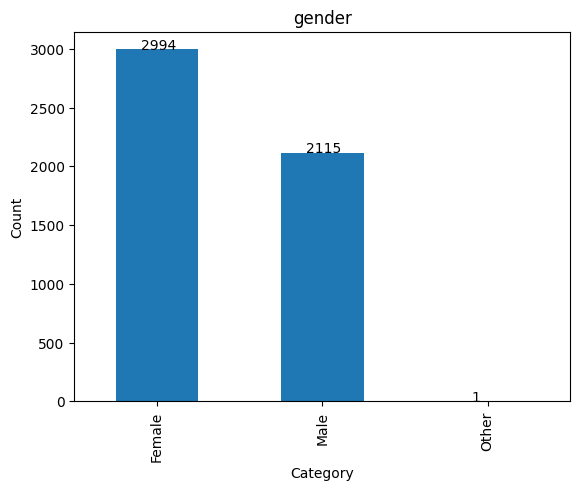

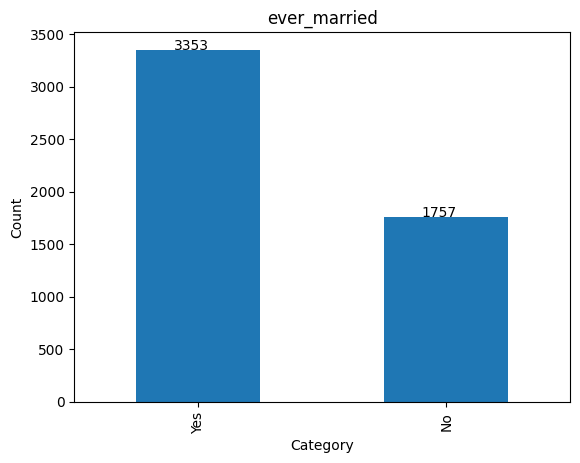

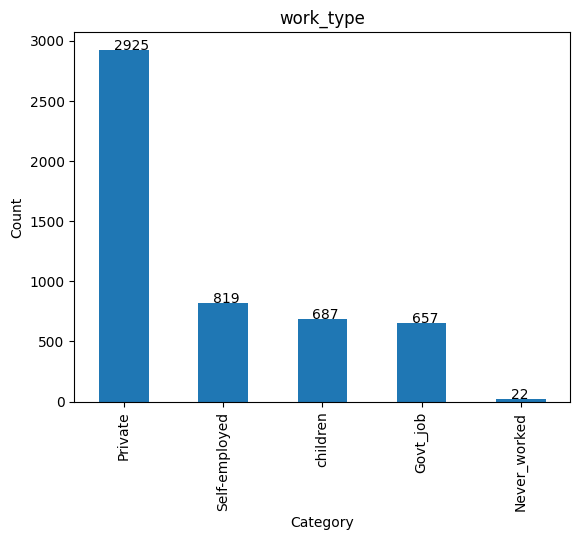

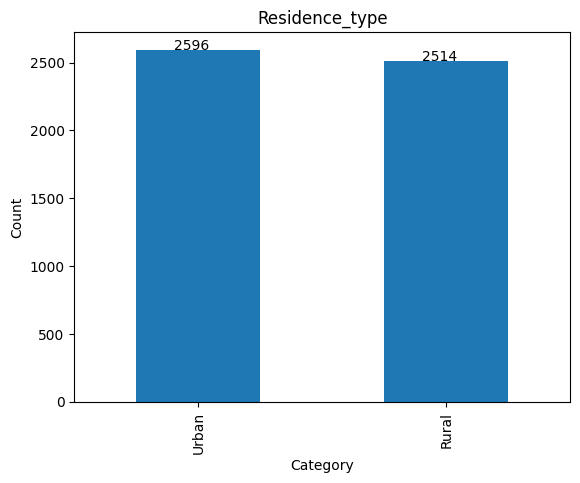

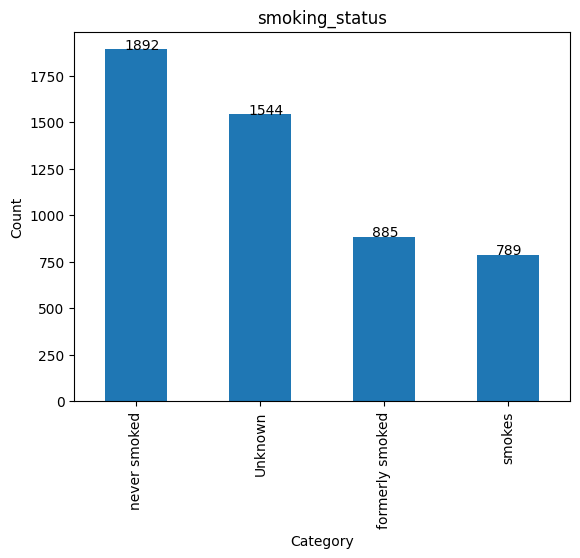

In [73]:
# non_cont_features = df.drop(['age', 'avg_glucose_level','bmi','stroke'], axis=1)
for column in cat_features:
    value_counts = cat_features[column].value_counts()
    ax = value_counts.plot.bar()
    ax.set_title(column)
    ax.set_xlabel("Category")
    ax.set_ylabel("Count")
    for i, v in enumerate(value_counts):
        ax.text(i - 0.1, v + 0.5, str(v), color='black')
    plt.show()


#Preprocessing

## Dropping unnecessary columns

In [74]:
df = df.drop(columns=['id'])


## Creating separate dataframes for numerical and categorical features

In [75]:
cat_df = []
num_df = []

for column in df.columns:
    if df[column].dtype == 'object':
        cat_df.append(column)
    else:
        num_df.append(column)


cat_features = df[cat_df]

del num_df[-1]
num_features = df[num_df]


cont_num_features = num_features.drop(['hypertension', 'heart_disease'], axis=1)
non_con_num_features = num_features[["hypertension","heart_disease"]]

## Checking for null values

<Axes: >

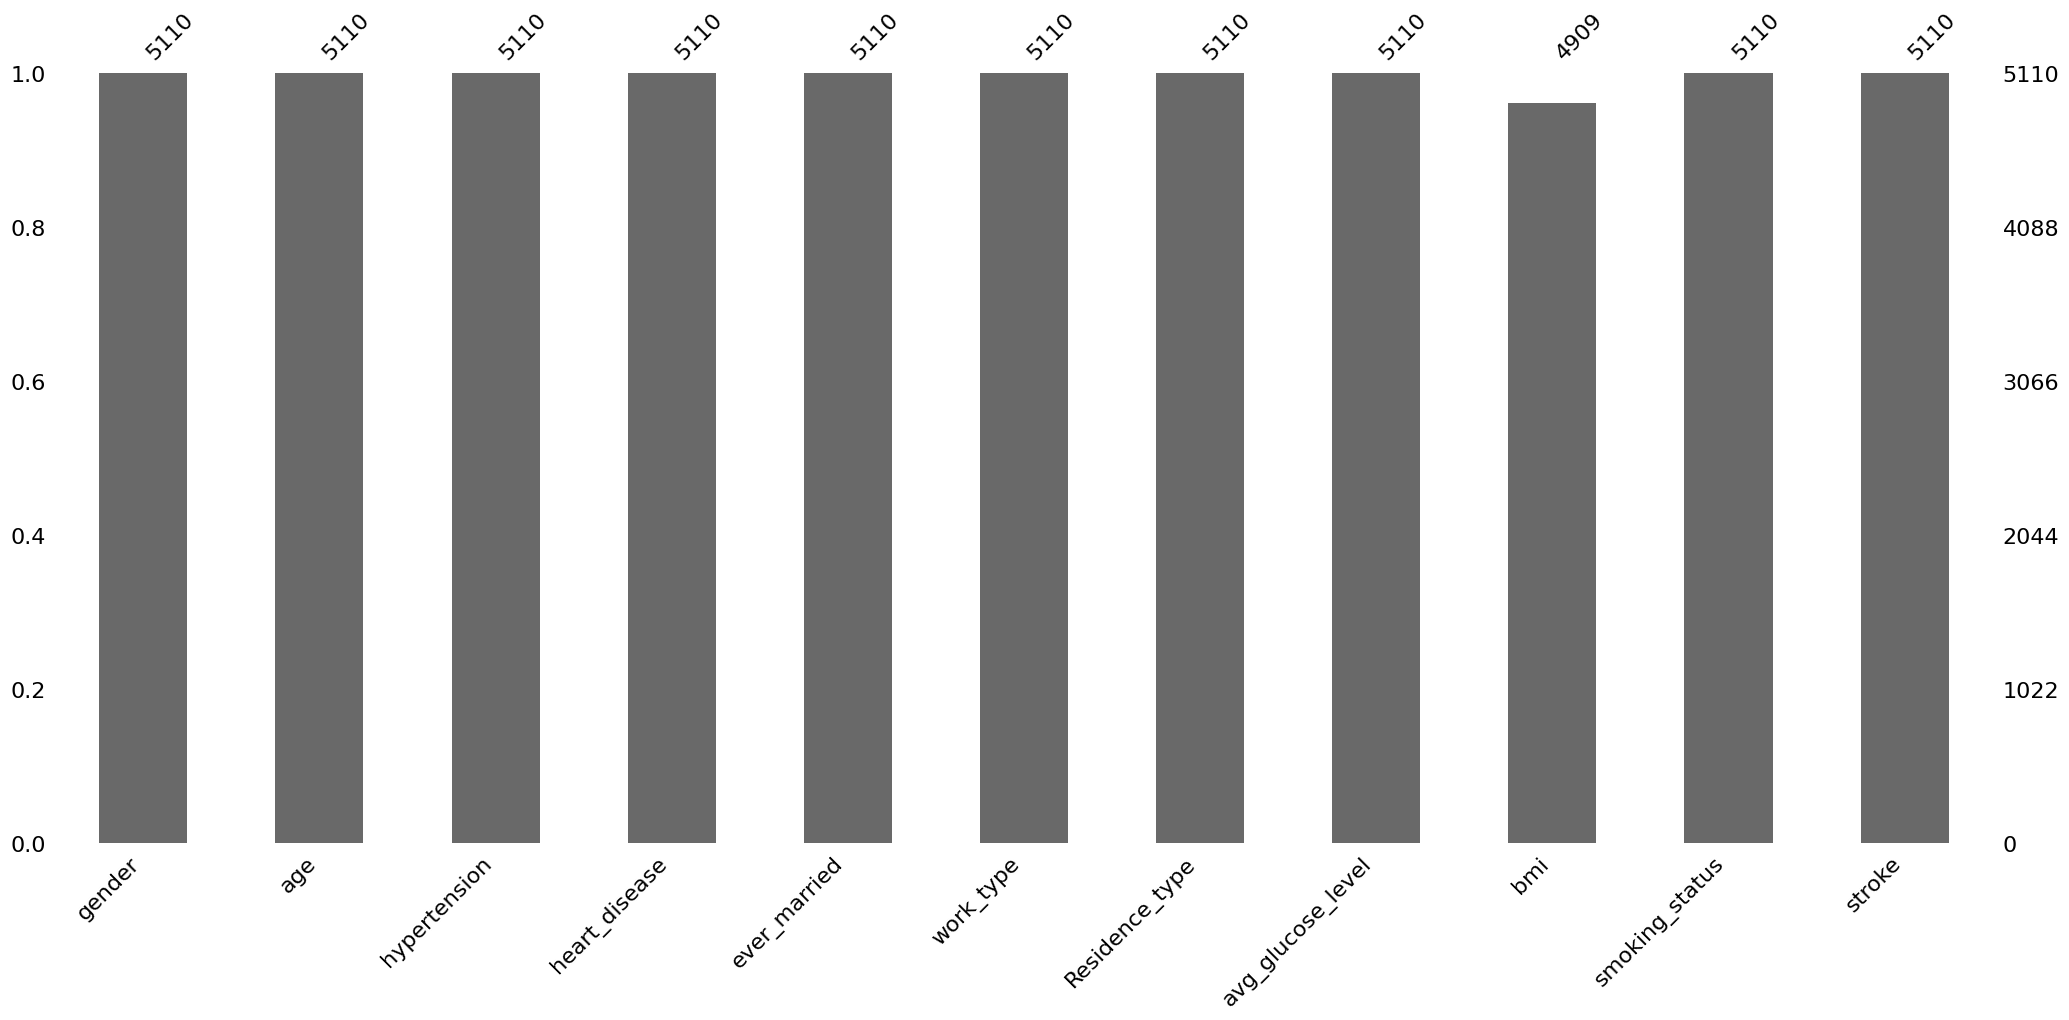

In [76]:
msno.bar(df)

### Imputing null values with the mean

<Axes: >

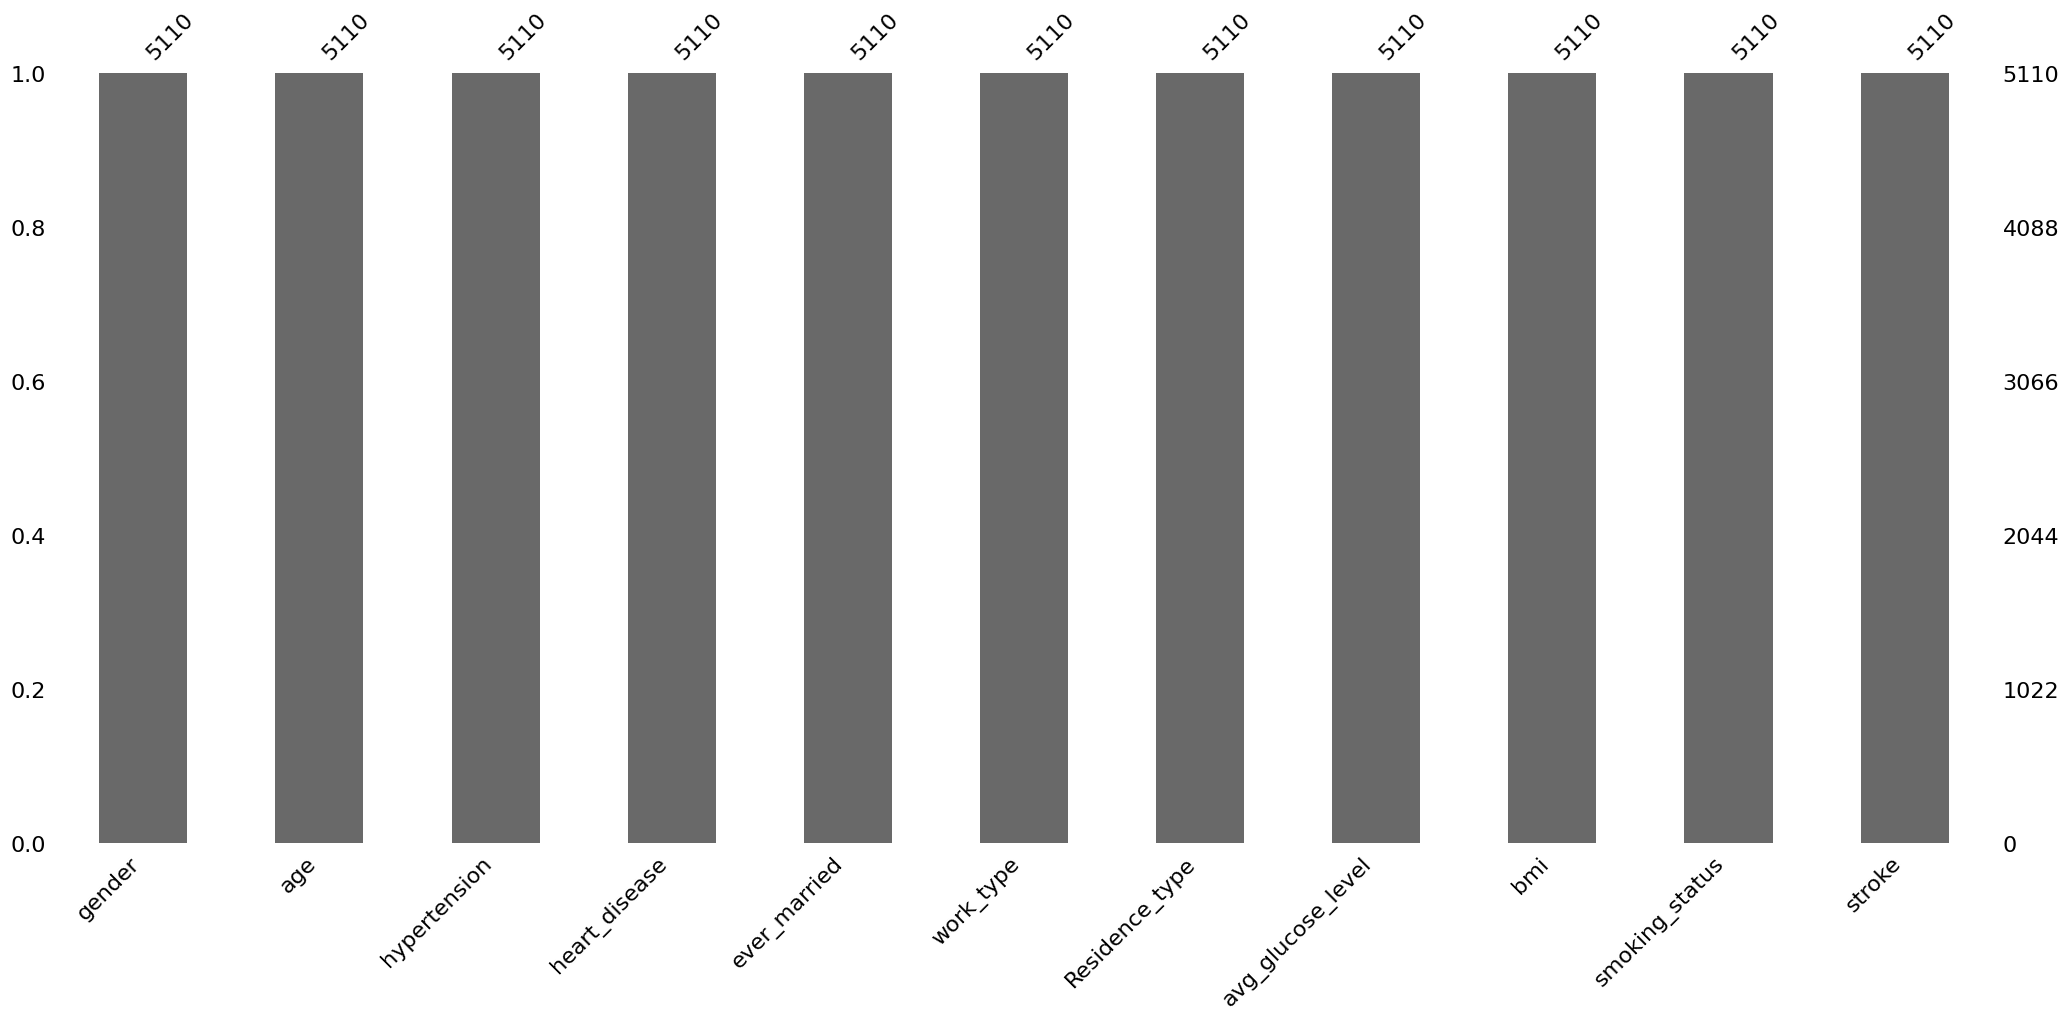

In [77]:
df['bmi'].fillna(df['bmi'].mean(),inplace = True)
# sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='cividis')
msno.bar(df)


## Checking for duplicates

In [78]:
duplicated_rows= df[df.duplicated()]
duplicated_rows.shape

(0, 11)

#Exploratory Data Analysis (EDA)

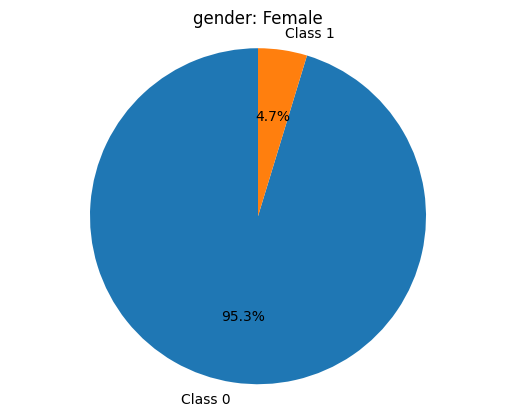

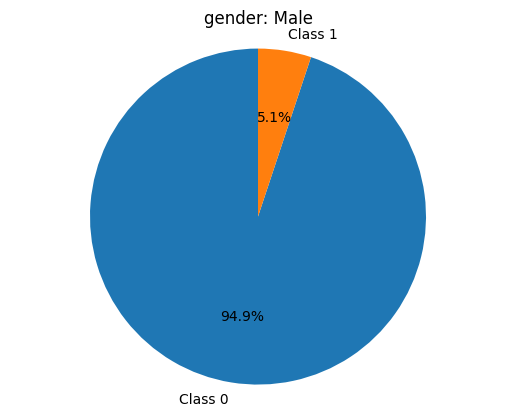

In [79]:
grouped = df.groupby(['gender', 'stroke']).size().reset_index(name='count')

# Pivot the table to get the count of each class_label for each color
pivoted = grouped.pivot(index='gender', columns='stroke', values='count').fillna(0)

# Create a pie chart for each color
for i, row in pivoted.iloc[:-1].iterrows():
    plt.figure()
    plt.pie(row, labels=['Class 0', 'Class 1'], autopct='%1.1f%%', startangle=90)
    plt.title(f'gender: {i}')
    plt.axis('equal')

plt.show()



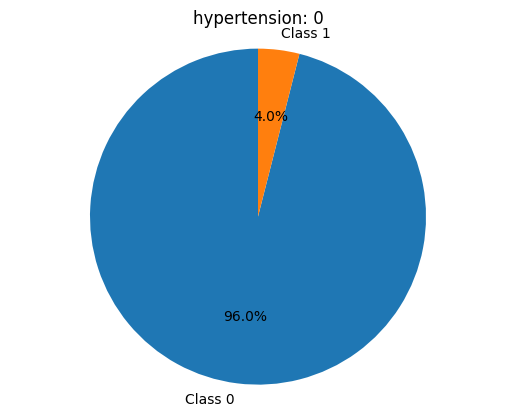

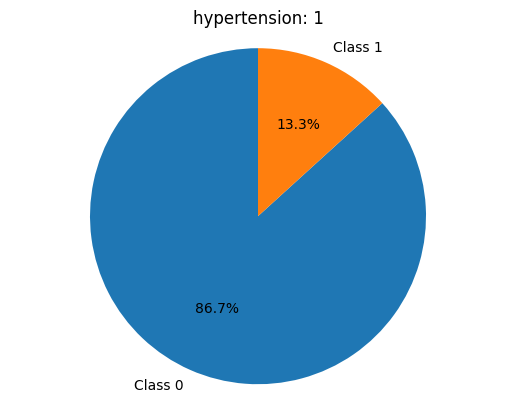

In [80]:
grouped = df.groupby(['hypertension', 'stroke']).size().reset_index(name='count')

# Pivot the table to get the count of each class_label for each color
pivoted = grouped.pivot(index='hypertension', columns='stroke', values='count').fillna(0)

# Create a pie chart for each color
for i, row in pivoted.iterrows():
    plt.figure()
    plt.pie(row, labels=['Class 0', 'Class 1'], autopct='%1.1f%%', startangle=90)
    plt.title(f'hypertension: {i}')
    plt.axis('equal')

plt.show()

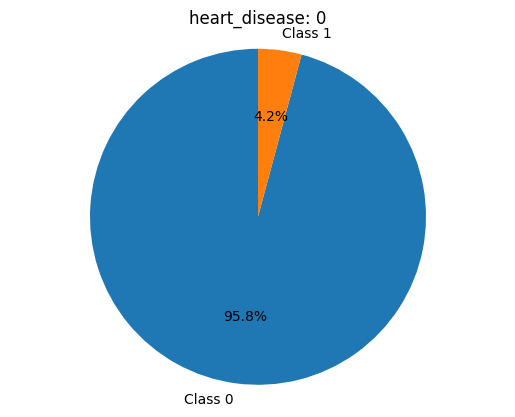

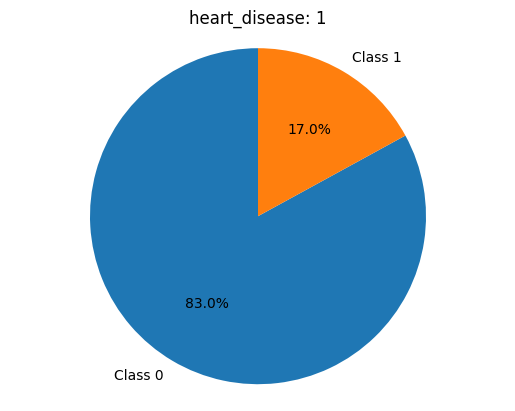

In [81]:
grouped = df.groupby(['heart_disease', 'stroke']).size().reset_index(name='count')

# Pivot the table to get the count of each class_label for each color
pivoted = grouped.pivot(index='heart_disease', columns='stroke', values='count').fillna(0)

# Create a pie chart for each colorf
for i, row in pivoted.iterrows():
    plt.figure()
    plt.pie(row, labels=['Class 0', 'Class 1'], autopct='%1.1f%%', startangle=90)
    plt.title(f'heart_disease: {i}')
    plt.axis('equal')

plt.show()

Individuals with a prior diagnosis of hypertension are at a substantially elevated risk of developing a stroke.

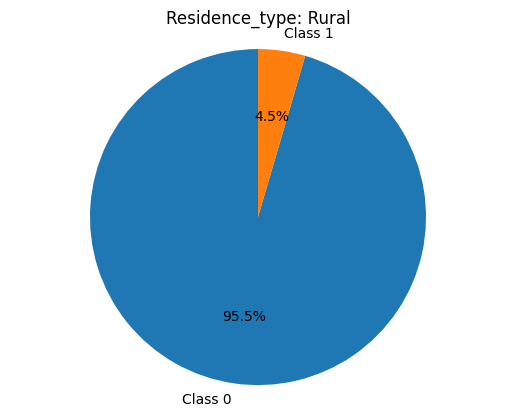

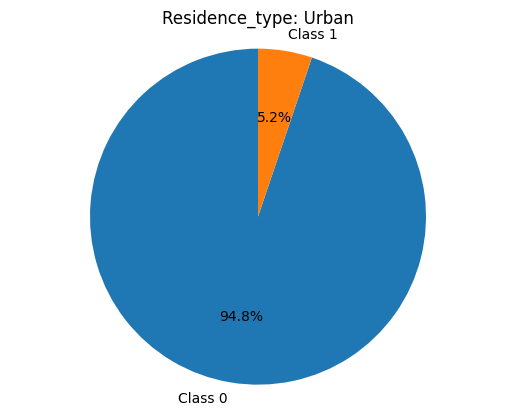

In [82]:
grouped = df.groupby(['Residence_type', 'stroke']).size().reset_index(name='count')

# Pivot the table to get the count of each class_label for each color
pivoted = grouped.pivot(index='Residence_type', columns='stroke', values='count').fillna(0)

# Create a pie chart for each color
for i, row in pivoted.iterrows():
    plt.figure()
    plt.pie(row, labels=['Class 0', 'Class 1'], autopct='%1.1f%%', startangle=90)
    plt.title(f'Residence_type: {i}')
    plt.axis('equal')

plt.show()

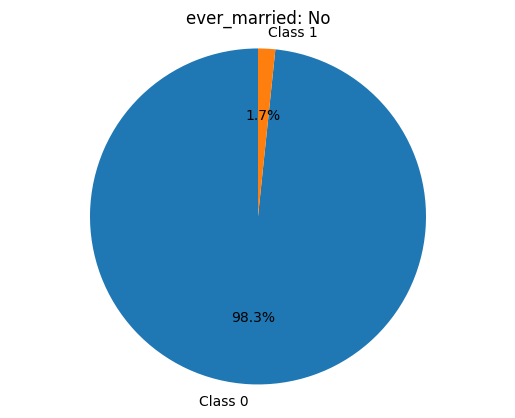

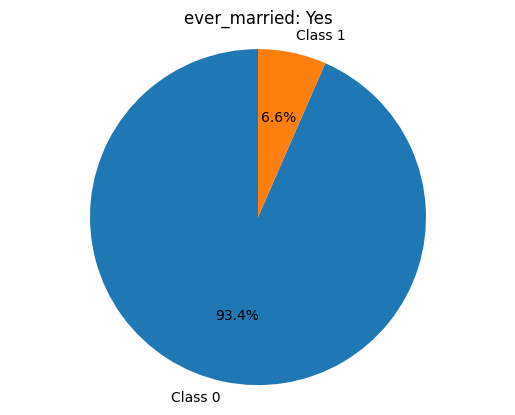

In [83]:
grouped = df.groupby(['ever_married', 'stroke']).size().reset_index(name='count')

# Pivot the table to get the count of each class_label for each color
pivoted = grouped.pivot(index='ever_married', columns='stroke', values='count').fillna(0)

# Create a pie chart for each color
for i, row in pivoted.iterrows():
    plt.figure()
    plt.pie(row, labels=['Class 0', 'Class 1'], autopct='%1.1f%%', startangle=90)
    plt.title(f'ever_married: {i}')
    plt.axis('equal')

plt.show()

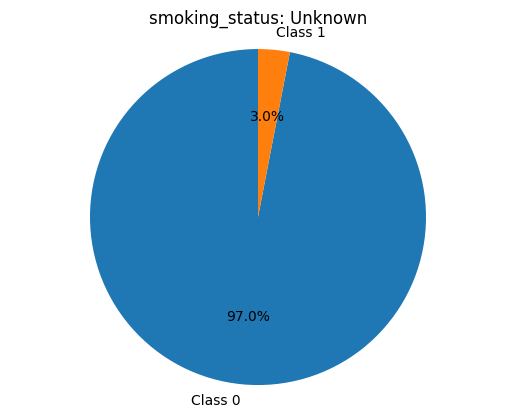

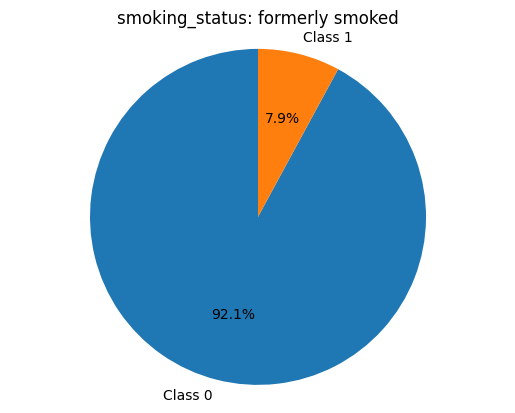

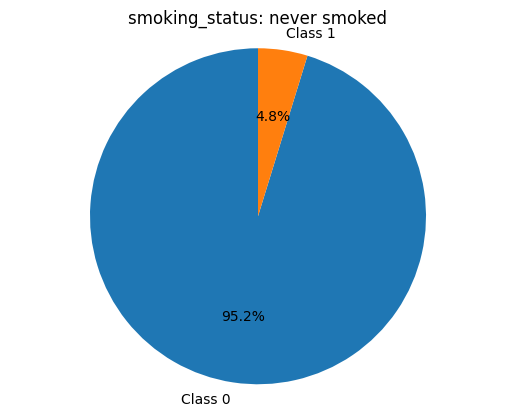

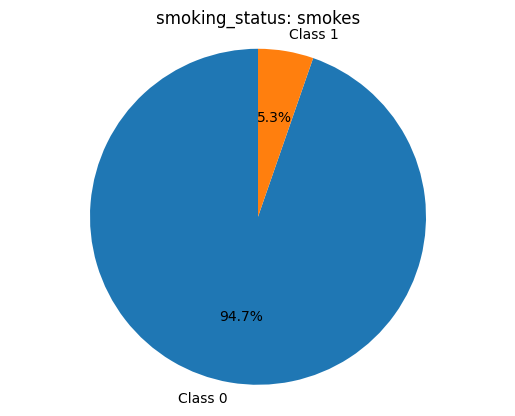

In [84]:
grouped = df.groupby(['smoking_status', 'stroke']).size().reset_index(name='count')

# Pivot the table to get the count of each class_label for each color
pivoted = grouped.pivot(index='smoking_status', columns='stroke', values='count').fillna(0)

# Create a pie chart for each color
for i, row in pivoted.iterrows():
    plt.figure()
    plt.pie(row, labels=['Class 0', 'Class 1'], autopct='%1.1f%%', startangle=90)
    plt.title(f'smoking_status: {i}')
    plt.axis('equal')

plt.show()

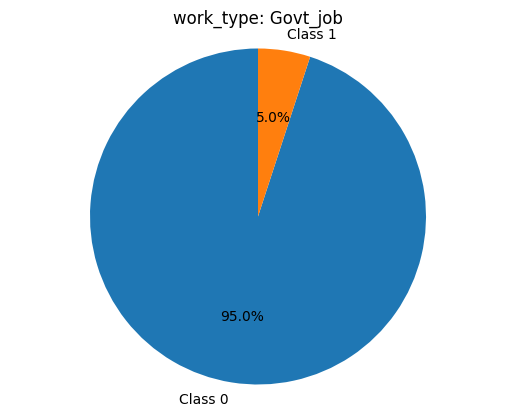

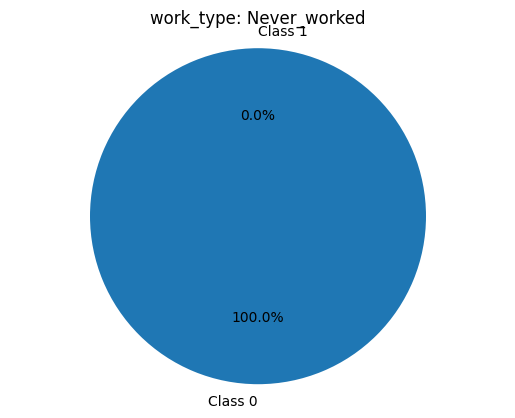

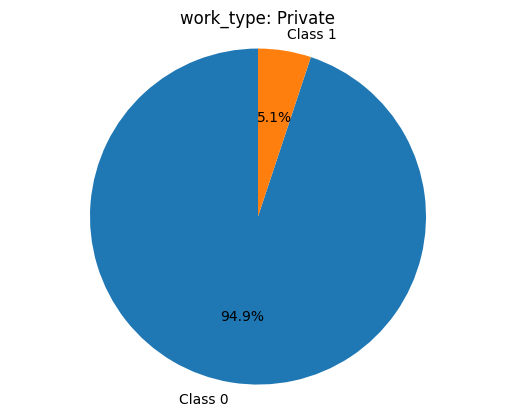

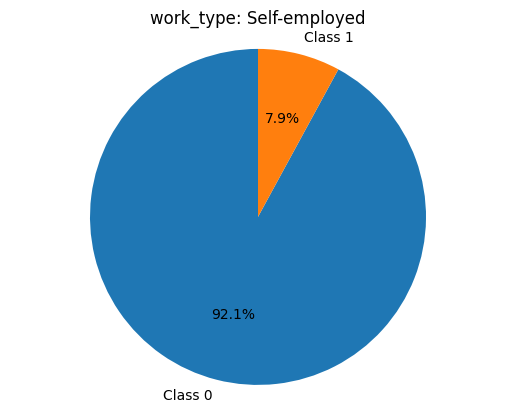

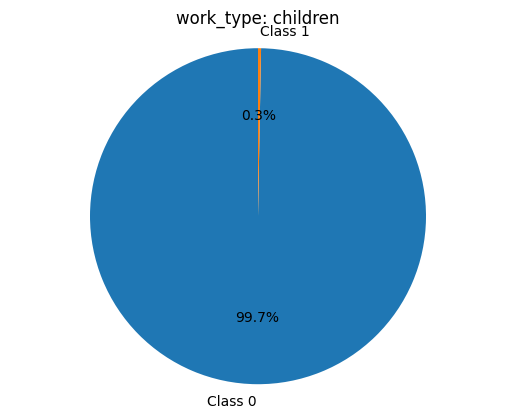

In [85]:
grouped = df.groupby(['work_type', 'stroke']).size().reset_index(name='count')

# Pivot the table to get the count of each class_label for each color
pivoted = grouped.pivot(index='work_type', columns='stroke', values='count').fillna(0)

# Create a pie chart for each color
for i, row in pivoted.iterrows():
    plt.figure()
    plt.pie(row, labels=['Class 0', 'Class 1'], autopct='%1.1f%%', startangle=90)
    plt.title(f'work_type: {i}')
    plt.axis('equal')

plt.show()

Upon analyzing the above visualization, several notable findings emerge:
1. Individuals with a prior diagnosis of hypertension are at a substantially elevated risk of developing a stroke.
2. Individuals with a history of hypertension are at a substantially elevated risk of developing a stroke.
3. Married individuals face a significantly higher risk of experiencing a stroke.
4. Individuals who smoke or have a history of smoking are at an elevated risk of stroke.
5. Individuals with work experience,are at a higher risk of stroke, whereas those without any work experience have a lower incidence of stroke.

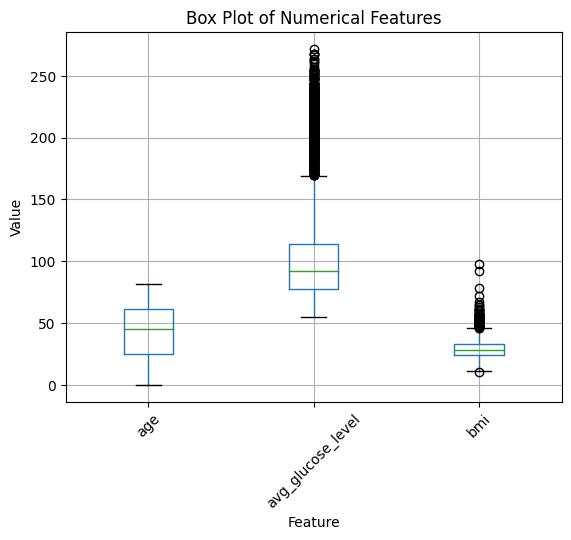

In [86]:
cont_num_features_list = list(cont_num_features.columns)
# create a box plot for each numerical column
df[cont_num_features_list].boxplot()
plt.xticks(rotation=45)
plt.title('Box Plot of Numerical Features')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.show()


There are outliers present in the data. we will deal with it in the later section.

<Axes: xlabel='stroke', ylabel='avg_glucose_level'>

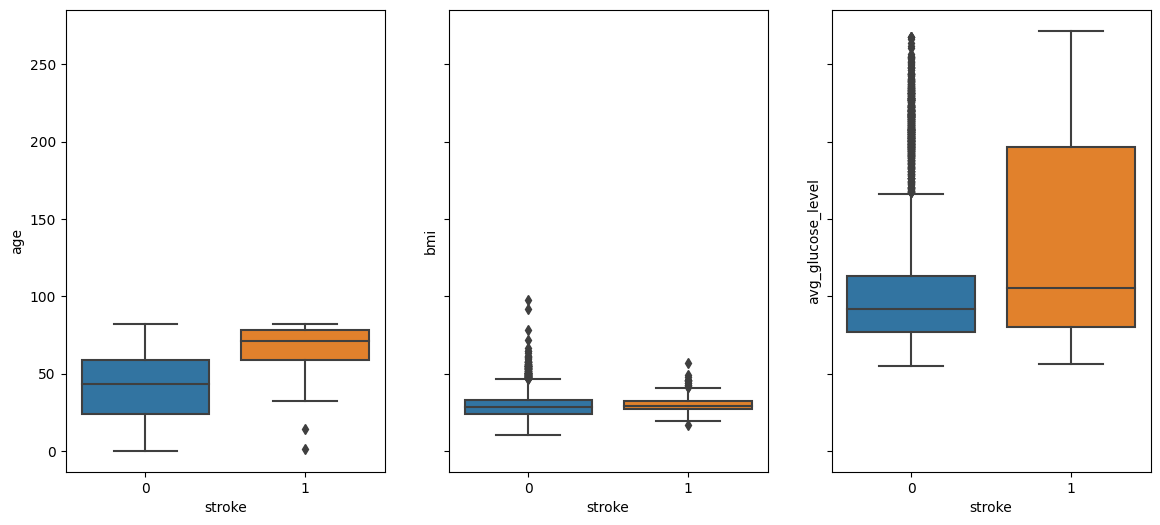

In [87]:
_, axes = plt.subplots(1, 3, sharey=True, figsize=(14, 6))
sns.boxplot(x="stroke", y="age", data=df, ax=axes[0])
sns.boxplot(x="stroke", y="bmi", data=df, ax=axes[1])
sns.boxplot(x="stroke", y="avg_glucose_level", data=df, ax=axes[2])

Upon analyzing the above visualization, several notable findings emerge:
1. The mean age of individuals diagnosed with stroke is typically higher, indicating a correlation between age and the risk of experiencing a stroke.
2.  Individuals with stroke exhibit elevated average glucose levels, suggesting a potential link between high glucose levels and the incidence of stroke.
3. The BMI index does not provide substantial evidence of its association with stroke risk.

##Distribution of numerical features

In [88]:
fig = ff.create_distplot([df[col] for col in ['age','avg_glucose_level', 'bmi']],
                         ['Age','Avg Glucose Level', 'BMI'],
                         show_hist=True, curve_type='normal',
                        bin_size=3.5)

# Add title
fig.update_layout(title_text='Distribution of numerical continuous features')
fig.update_traces(marker = dict(line = dict(color = 'white', width = 2)))
fig.show()


"Avg Glucose Level" is rightly skewed. Other features are almost normally distributed

# Outliers Removal

## Skewness

In [89]:
for column in cont_num_features_list:
  print(f'Skewness value of {column}: ',df[column].skew())

Skewness value of age:  -0.1370593225984694
Skewness value of avg_glucose_level:  1.5722838665030459
Skewness value of bmi:  1.0767160713842094


### Portion of the data that is above the upper whisker

In [90]:
for column in cont_num_features_list:

  # calculate the third quartile and interquartile range

  q3 = np.percentile(df[column], 75)
  iqr = np.percentile(df[column], 75) - np.percentile(df[column], 25)

  # calculate the upper whisker
  upper_whisker = q3 + 1.5*iqr

  # count the number of data points above the upper whisker
  num_above_upper_whisker = (df[column] > upper_whisker).sum()

  # calculate the percentage of data above the upper whisker
  percent_above_upper_whisker = num_above_upper_whisker / len(df[column]) *100

  print(f'{percent_above_upper_whisker:.2f}% of the data is above the upper whisker({column})')

0.00% of the data is above the upper whisker(age)
12.27% of the data is above the upper whisker(avg_glucose_level)
2.45% of the data is above the upper whisker(bmi)


### Portion of the data that is below the lower whisker

In [91]:
for column in cont_num_features_list:
  q1 = np.percentile(df[column], 25)
  iqr = np.percentile(df[column], 75) - np.percentile(df[column], 25)

  # calculate the lower whisker
  lower_whisker = q1 - 1.5*iqr

  # count the number of data points below the lower whisker
  num_below_lower_whisker = (df[column] < lower_whisker).sum()

  # calculate the percentage of data below the lower whisker
  percent_below_lower_whisker = num_below_lower_whisker / len(df[column]) * 100

  print(f'{percent_below_lower_whisker:.2f}% of the data is below the lower whisker({column})')

df.shape

0.00% of the data is below the lower whisker(age)
0.00% of the data is below the lower whisker(avg_glucose_level)
0.02% of the data is below the lower whisker(bmi)


(5110, 11)

## Removal

In [92]:
for column in cont_num_features_list:
  q1 = np.percentile(df[column], 25)
  q3 = np.percentile(df[column], 75)

  iqr = q3 - q1

  lower_whisker = q1 - 1.5*iqr
  upper_whisker = q3 + 1.5*iqr

  # create a new DataFrame that contains only the data points within the range of the lower and upper whiskers
  df = df[(df[column] >= lower_whisker) & (df[column] <= upper_whisker)]


In [93]:
# Resetting the index
df.reset_index(drop=True,inplace=True)
df.shape


(4383, 11)

### Distribution of numerical features after outliers removal

In [94]:
fig = ff.create_distplot([df[col] for col in ['age','avg_glucose_level', 'bmi']],
                         ['Age','Avg Glucose Level', 'BMI'],
                         show_hist=True, curve_type='normal',
                        bin_size=3.5)

# Add title
fig.update_layout(title_text='Distribution of numerical continuous features')
fig.update_traces(marker = dict(line = dict(color = 'white', width = 2)))
fig.show()


# Feature Engineering

## Label encoding(One-hot)





In [95]:
df = pd.get_dummies(df, columns = ['gender','ever_married','work_type','Residence_type','smoking_status'],
                    drop_first=True)
df.head()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
1,74.0,1,1,70.09,27.400000,1,1,0,1,0,1,0,0,0,0,1,0
2,69.0,0,0,94.39,22.800000,1,0,0,0,0,1,0,0,1,0,1,0
3,59.0,0,0,76.15,28.893237,1,0,0,1,0,1,0,0,0,0,0,0
4,78.0,0,0,58.57,24.200000,1,0,0,1,0,1,0,0,1,0,0,0


## Feature Selection

### Pearson's Coorelatoin

<Axes: >

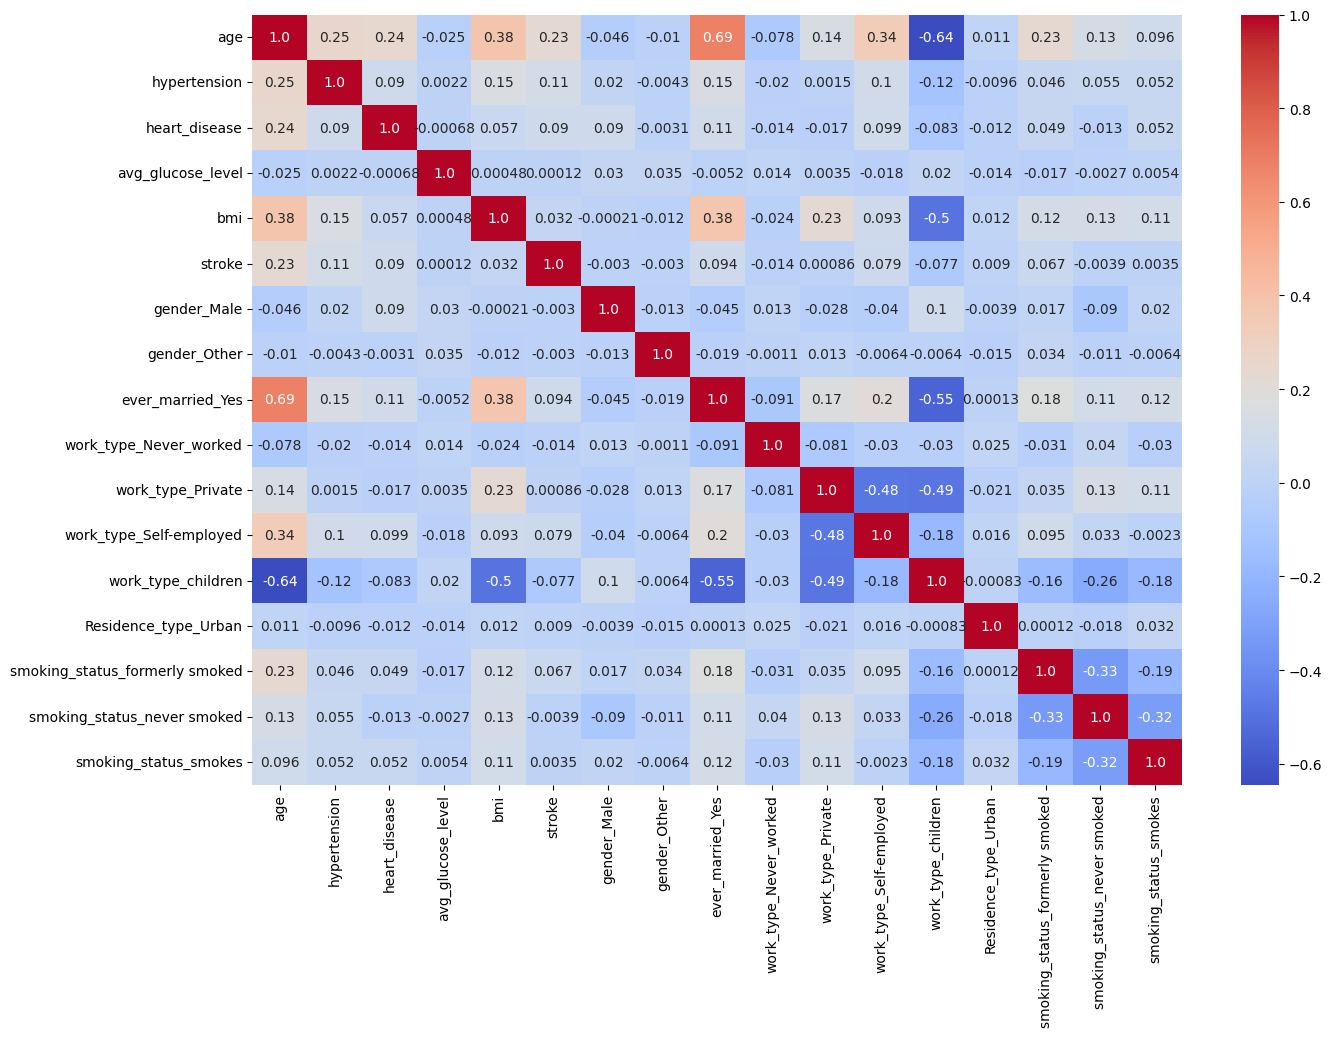

In [96]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt='.2',cmap="coolwarm")

In [97]:
# column_names = df.columns.tolist()
# print(column_names)

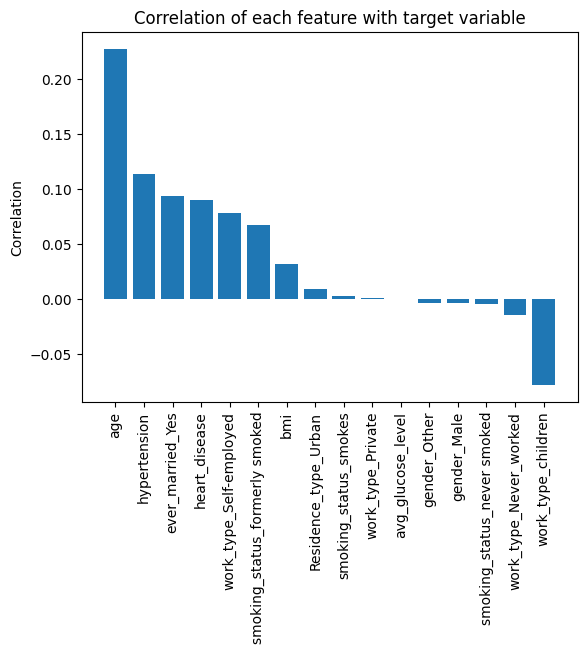

In [98]:
corr = df.corr()['stroke'].sort_values(ascending=False)[1:]

# create bar graph of correlations
plt.bar(x=corr.index, height=corr.values)
plt.xticks(rotation=90)
plt.ylabel('Correlation')
plt.title('Correlation of each feature with target variable')
plt.show()

### Chi-Squared Test

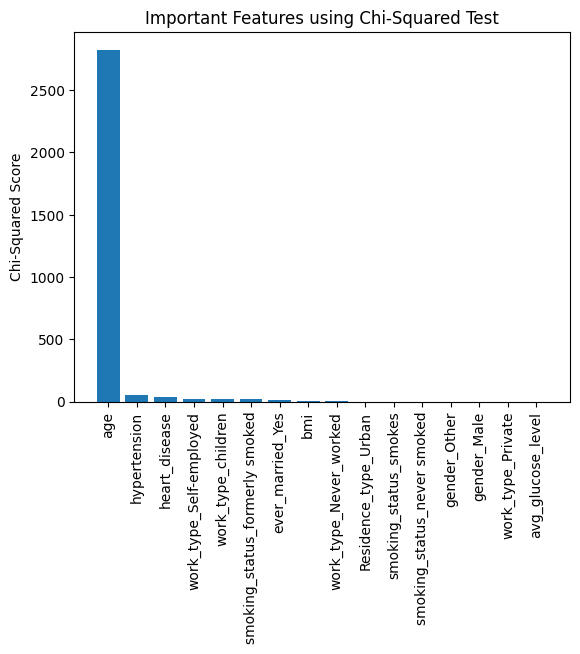

In [99]:
X = df.drop(columns=['stroke'],axis = 1)
Y = df['stroke']



selector = SelectKBest(chi2, k='all')

X_new = selector.fit_transform(X, Y)


idxs_selected = selector.get_support(indices=True)


features_selected = X.columns[idxs_selected]


scores = selector.scores_[idxs_selected]
sorted_idx = scores.argsort()[::-1]
features_sorted = features_selected[sorted_idx]

plt.bar(features_sorted, scores[sorted_idx])
plt.xticks(rotation=90)
plt.ylabel('Chi-Squared Score')
plt.title('Important Features using Chi-Squared Test')
plt.show()


### Check for Multicollinearity

In [100]:
# X = df[['age','avg_glucose_level']]
# X_cont = df[['age','avg_glucose_level','bmi','hypertension','heart_disease']]
X_cont = df[['age','ever_married_Yes','hypertension','heart_disease']]


In [101]:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X_cont .values, i) for i in range(X_cont .shape[1])]

vif["features"] =X_cont .columns
# variables.shape
vif


,VIF,features
0,5.400123,age
1,5.034055,ever_married_Yes
2,1.148173,hypertension
3,1.099228,heart_disease


All the features meet the VIF acceptance level.

In [102]:
df_final=df[['age','hypertension','heart_disease','ever_married_Yes','stroke']]
df_final.head()

,age,hypertension,heart_disease,ever_married_Yes,stroke
0,80.0,0,1,1,1
1,74.0,1,1,1,1
2,69.0,0,0,0,1
3,59.0,0,0,1,1
4,78.0,0,0,1,1


In [103]:
X = df_final.drop(columns=['stroke'],axis = 1)

Y = df_final['stroke']

# Check for Data imbalance

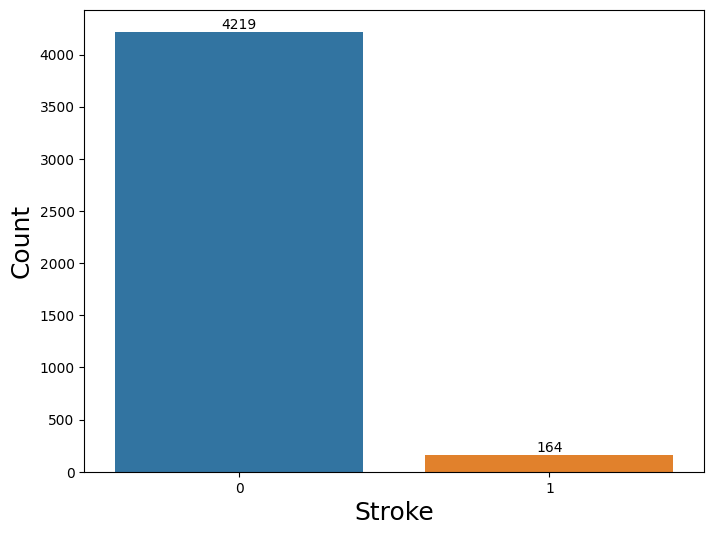

In [104]:
class_count = df_final['stroke'].value_counts()
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=class_count.index, y=class_count)
plt.xlabel('Stroke', fontsize=18)
plt.ylabel('Count', fontsize=18)

# Add count labels to the bars
for p in ax.patches:
    count = int(p.get_height())  # Convert the count to integer
    ax.annotate(f"{count}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')

plt.show()

Data imbalance exist in the dataset

## Oversampling (SMOTE)

In [105]:
smote = SMOTE()

x_bal, y_bal = smote.fit_resample(X,Y)

In [106]:
df_final = pd.concat([pd.DataFrame(x_bal), pd.DataFrame(y_bal)], axis=1)

df_final.head()

,age,hypertension,heart_disease,ever_married_Yes,stroke
0,80.0,0,1,1,1
1,74.0,1,1,1,1
2,69.0,0,0,0,1
3,59.0,0,0,1,1
4,78.0,0,0,1,1


In [107]:
X = df_final.drop(columns=['stroke'],axis = 1)

Y = df_final['stroke']

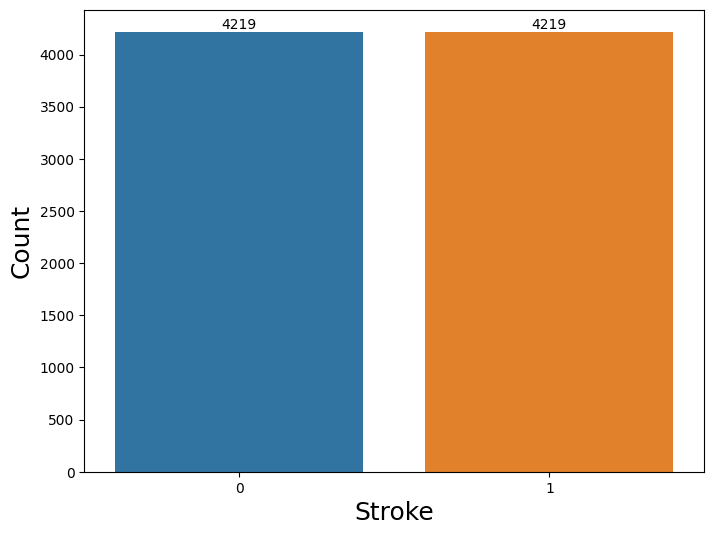

In [108]:
class_count = df_final['stroke'].value_counts()
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=class_count.index, y=class_count)
plt.xlabel('Stroke', fontsize=18)
plt.ylabel('Count', fontsize=18)

# Add count labels to the bars
for p in ax.patches:
    count = int(p.get_height())  # Convert the count to integer
    ax.annotate(f"{count}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')

plt.show()

# Model Development

##Train/Test split

In [109]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)


In [110]:
x_train.shape

(6750, 4)

In [111]:
x_test.shape

(1688, 4)

## Standardization

In [112]:
scaler = MinMaxScaler()

cols_to_scale = ['age']

scaler.fit(x_train[cols_to_scale])


MinMaxScaler()

In [113]:
train_scaled = scaler.transform(x_train[cols_to_scale])

In [114]:
test_scaled = scaler.transform(x_test[cols_to_scale])


In [115]:
with open("fitted_scaler.pkl", "wb") as file:
    pickle.dump(scaler,file)

In [116]:
x_train['age']=train_scaled

In [117]:
x_train.head()

,age,hypertension,heart_disease,ever_married_Yes
7059,0.902344,0,0,1
1253,0.560547,0,0,1
463,0.633789,0,0,0
1928,0.865723,1,0,1
5198,0.928156,0,0,1


In [118]:
x_test['age']=test_scaled

## Random Forest Classifier

### Hyperparameter tuning

In [119]:
RF_model = RandomForestClassifier(random_state=42)

In [120]:
n_estimators = [10,100,150]

max_depth = [None,10,15,20]

param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth

}

In [121]:
RF_grid = GridSearchCV(estimator = RF_model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [122]:
RF_grid.fit(x_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=4,
             param_grid={'max_depth': [None, 10, 15, 20],
                         'n_estimators': [10, 100, 150]},
             verbose=2)

In [123]:
RF_grid.best_params_

{'max_depth': None, 'n_estimators': 150}

In [124]:
best_rf_params = RF_grid.best_params_

In [125]:
RF_model = RandomForestClassifier(**best_rf_params)

In [126]:
RF_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=150)

### Model Evaluation

In [127]:
y_pred_train =RF_model.predict(x_train)


print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      3381
           1       0.86      0.96      0.91      3369

    accuracy                           0.90      6750
   macro avg       0.91      0.90      0.90      6750
weighted avg       0.91      0.90      0.90      6750



In [128]:
y_pred_test = RF_model.predict(x_test)


print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       838
           1       0.88      0.93      0.90       850

    accuracy                           0.90      1688
   macro avg       0.90      0.90      0.90      1688
weighted avg       0.90      0.90      0.90      1688



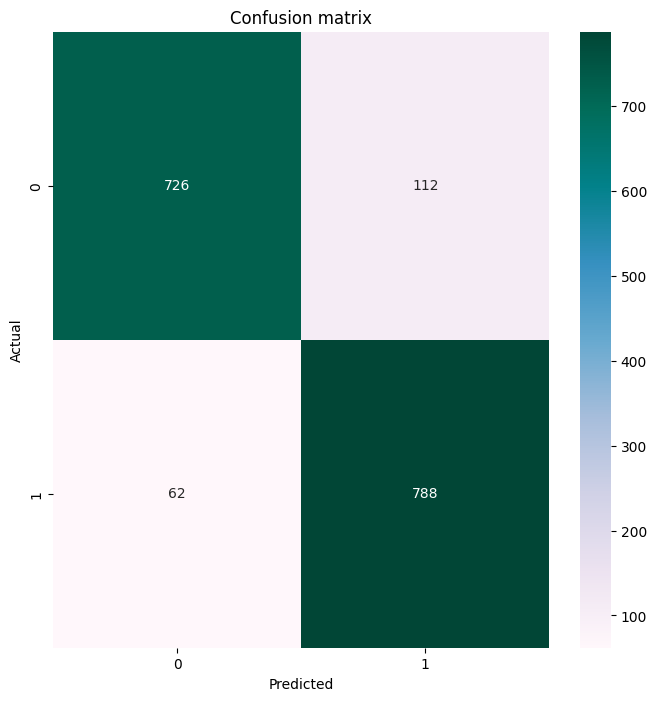

In [129]:
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, cmap='PuBuGn' , fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion matrix")
plt.show()

## Decision Tree Classifier

###Hyper parameter tuning

In [130]:
DT_model = DecisionTreeClassifier(random_state=42)

In [131]:
max_depth = [None,5,10,15,20,25]

param_grid = {'max_depth': max_depth}

In [132]:
dt_grid = GridSearchCV(estimator =DT_model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [133]:
dt_grid.fit(x_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=4,
             param_grid={'max_depth': [None, 5, 10, 15, 20, 25]}, verbose=2)

In [134]:
dt_grid.best_params_

{'max_depth': None}

In [135]:
best_dt_params =dt_grid.best_params_

In [136]:
DT_model = DecisionTreeClassifier(**best_dt_params)

In [137]:
DT_model.fit(x_train, y_train)

DecisionTreeClassifier()

### Model Evaluation

In [138]:
y_pred_train = DT_model.predict(x_train)

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      3381
           1       0.86      0.96      0.91      3369

    accuracy                           0.90      6750
   macro avg       0.91      0.90      0.90      6750
weighted avg       0.91      0.90      0.90      6750



In [139]:
y_pred_test = DT_model.predict(x_test)

print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.92      0.87      0.89       838
           1       0.88      0.93      0.90       850

    accuracy                           0.90      1688
   macro avg       0.90      0.90      0.90      1688
weighted avg       0.90      0.90      0.90      1688



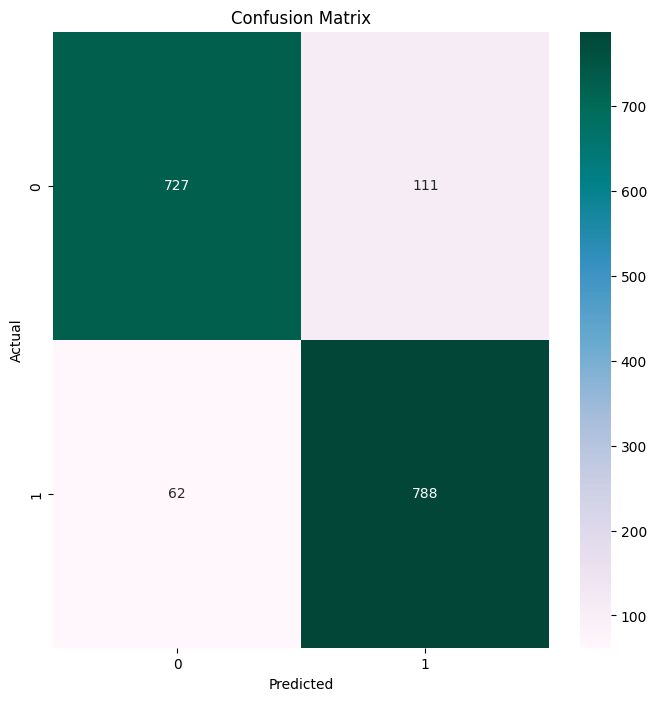

In [140]:
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, cmap='PuBuGn' , fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## K-Nearest Neighbour

In [141]:
knn_model = KNeighborsClassifier(n_neighbors=5)


knn_model.fit(x_train, y_train)

KNeighborsClassifier()

### Model Evaluation

In [142]:
y_pred_train =knn_model.predict(x_train)


print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      3381
           1       0.87      0.88      0.88      3369

    accuracy                           0.87      6750
   macro avg       0.87      0.87      0.87      6750
weighted avg       0.87      0.87      0.87      6750



In [143]:
y_pred_test = knn_model.predict(x_test)


print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       838
           1       0.86      0.87      0.87       850

    accuracy                           0.87      1688
   macro avg       0.87      0.87      0.87      1688
weighted avg       0.87      0.87      0.87      1688



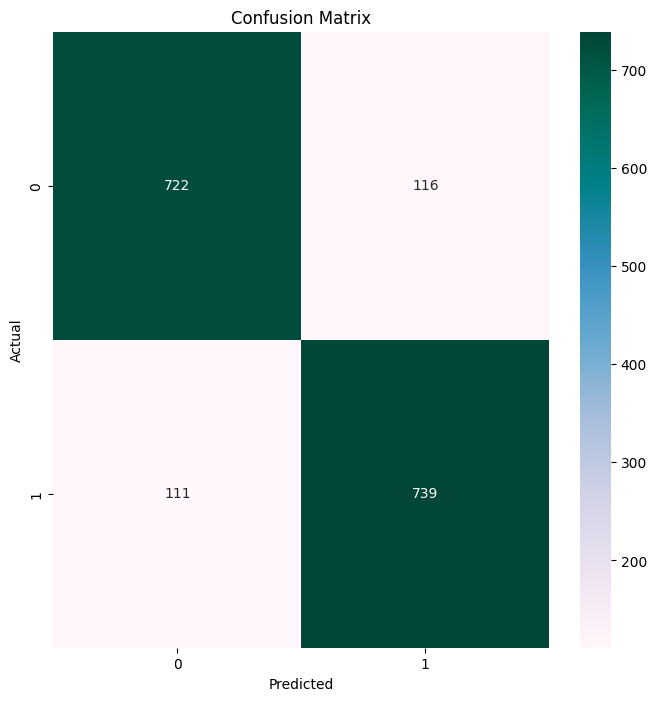

In [144]:
cm = confusion_matrix(y_test, y_pred_test)


plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, cmap='PuBuGn' , fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Logistic Regression

In [145]:
logistic_regression_model = LogisticRegression()

logistic_regression_model.fit(x_train, y_train)

LogisticRegression()

### Model Evaluation

In [146]:
y_pred_train = logistic_regression_model.predict(x_train)

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76      3381
           1       0.76      0.79      0.77      3369

    accuracy                           0.77      6750
   macro avg       0.77      0.77      0.77      6750
weighted avg       0.77      0.77      0.77      6750



In [147]:
y_pred_test = logistic_regression_model.predict(x_test)

print(classification_report(y_test,y_pred_test))


              precision    recall  f1-score   support

           0       0.78      0.75      0.77       838
           1       0.76      0.79      0.78       850

    accuracy                           0.77      1688
   macro avg       0.77      0.77      0.77      1688
weighted avg       0.77      0.77      0.77      1688



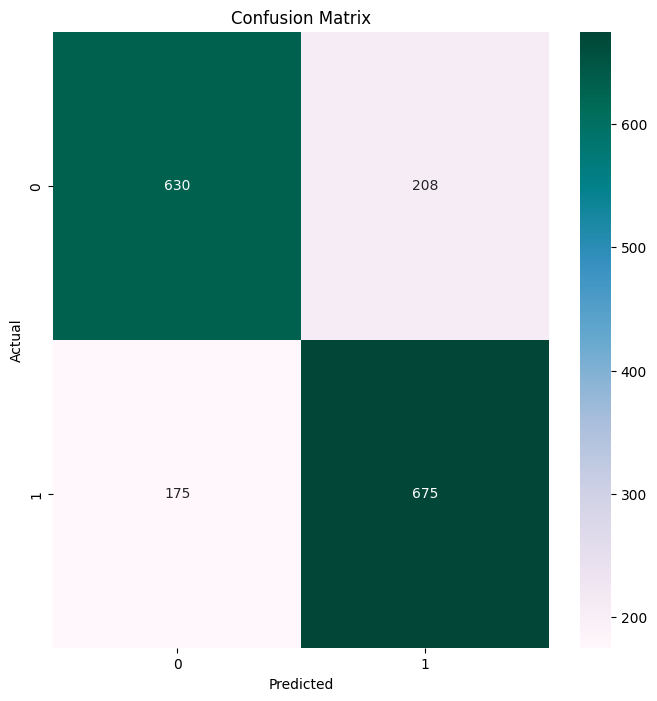

In [148]:
cm = confusion_matrix(y_test, y_pred_test)


plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, cmap='PuBuGn' , fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [149]:
models = [DT_model,logistic_regression_model, RF_model, knn_model]


kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = []
for model in models:
    scores = cross_val_score(model, x_train, y_train, cv=kf, scoring='accuracy')
    cv_scores.append(scores.mean())


In [150]:
model_names = ['Decision Tree', 'Logistic Regression', 'Random Forest','K Nearest Neighbors']

model_score_df = pd.DataFrame({'Model': model_names, 'CV Score': cv_scores})

model_score_df = model_score_df.sort_values(by=['CV Score'], ascending=False)

model_score_df = model_score_df.reset_index(drop=True)

model_score_df

,Model,CV Score
0,Random Forest,0.884444
1,Decision Tree,0.884000
2,K Nearest Neighbors,0.855259
3,Logistic Regression,0.766222


In [151]:
best_model_index = cv_scores.index(max(cv_scores))
best_model = models[best_model_index]
print(best_model)

RandomForestClassifier(n_estimators=150)


In [152]:
# best_model = RandomForestClassifier(**best_rf_params, random_state=42)

In [153]:
best_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=150)

In [154]:
def predict_stroke(features):

    age, hypertension, heart_disease, ever_married_yes = features

    input_features = np.array([age, hypertension, heart_disease, ever_married_yes]).reshape(1, -1)

    std_age = scaler.transform(np.array(age).reshape(-1, 1))

    input_features[0][0] = std_age

    prediction =best_model.predict(input_features)

    return prediction

features = [35, 0, 0, 0]
result = predict_stroke(features)

if result == 1:
    print("The person is predicted to have had a brain stroke.")
else:
    print("The person is predicted to not have had a brain stroke.")

The person is predicted to not have had a brain stroke.


In [155]:
pickle.dump(best_model, open('stroke_prediction_model.pkl','wb'))